### IMPORTACIONES

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



### VISUALIZACIÓN DEL DATASET

In [127]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### SELECCIÓN DE COLUMNAS
Se seleccinan las columnas con las que se va a entrenar el modelo, en este caso ```edad y colesterol``` para X y ```target``` para indicar si tiene o no problemas en el corazón, que será "y"

In [128]:
X = df[['age', 'chol', 'cp', 'thalach', 'exang']]
y = df['target']


### ESCALAR VARIABLES
En esta ocasión se utilizó la función "StandardScaler" para poder escalar un rango de números y hacer que los valores de una variable tengan un rango común, por ejemplo;
* Si una variable tiene valores muy grandes (ej: colesterol entre 150-300) y otra muy pequeños (ej: edad entre 30-80), el modelo puede darle más importancia a la de mayor escala, aunque no sea más relevante.



In [129]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### ENTRENAMIENTO Y PRUEBA
Se utiliza "train_test_split" para dividir el entrenamiento y las pruebas

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



### ENTRENAMIENTO DE MODELO
Se entrena el modelo por 1000 iteraciones usando las variables de x_train e y_train

In [131]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### PREDICCIÓN Y PRECISIÓN
Se predicen los resultados con el X_test y se mide la precisión comparando las predicciones (y_pred) con los valores reales (y_test).

In [134]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.72


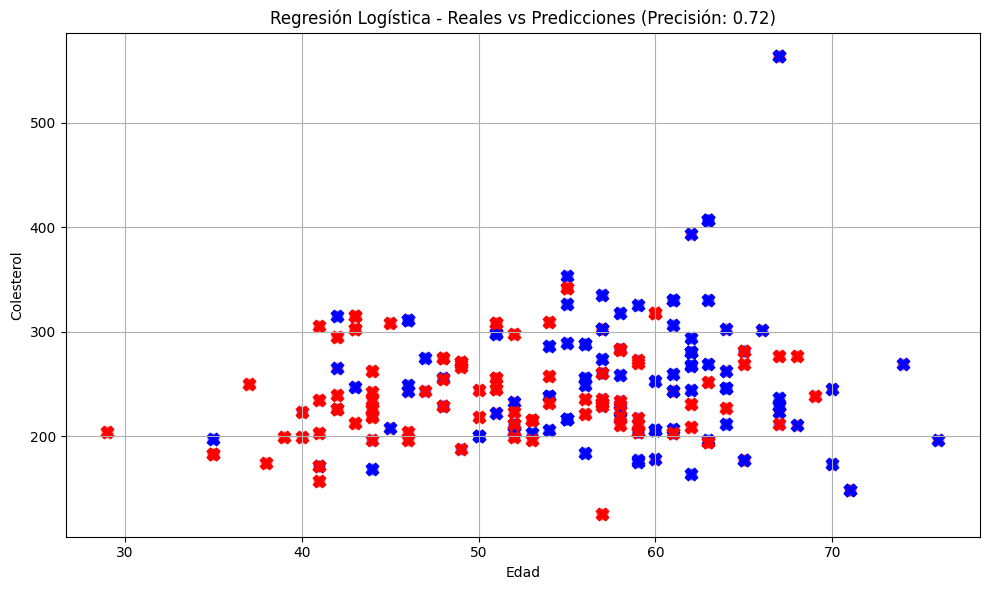

In [142]:

X_test_original = scaler.inverse_transform(X_test)

df_plot = pd.DataFrame(X_test_original, columns=['age', 'chol', 'cp', 'thalach', 'exang'])
df_plot['target_real'] = y_test.values
df_plot['target_pred'] = y_pred

plt.figure(figsize=(10, 6))
# Filtrar por clase real y predicha
real_0 = df_plot[df_plot['target_real'] == 0]
real_1 = df_plot[df_plot['target_real'] == 1]
pred_0 = df_plot[df_plot['target_pred'] == 0]
pred_1 = df_plot[df_plot['target_pred'] == 1]

# Reales
plt.scatter(real_0['age'], real_0['chol'], color='blue', label='Real: No enfermedad', alpha=0.4, s=60)
plt.scatter(real_1['age'], real_1['chol'], color='red', label='Real: Enfermedad', alpha=0.4, s=60)

# Predicciones
plt.scatter(pred_0['age'], pred_0['chol'], color='blue', marker='X', label='Predicho: No enfermedad', s=80)
plt.scatter(pred_1['age'], pred_1['chol'], color='red', marker='X', label='Predicho: Enfermedad', s=80)

plt.title(f'Regresión Logística - Reales vs Predicciones (Precisión: {accuracy:.2f})')
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.grid(True)
plt.tight_layout()
plt.show()



In [135]:
import joblib 
joblib.dump(model, "clasificacion.pkl")

['clasificacion.pkl']